In [3]:
# 📦 Libraries
import pandas as pd
import numpy as np
import random
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [4]:
from google.colab import files
uploaded = files.upload()


Saving ObesityDataSet_Dirty.csv to ObesityDataSet_Dirty.csv


In [5]:
df = pd.read_csv("ObesityDataSet_Dirty.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Daily_Calorie_Intake,Physical_Activity_Level,Genetic_Obesity_Risk
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,NaN,no,2.0,no,0.0,NaN,no,Public_Transportation,Normal_Weight,2368.0,Low,0.65
1,Female,NaN,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,NaN,3.0,NaN,Sometimes,Public_Transportation,Normal_Weight,2744.0,High,0.65
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,NaN,Normal_Weight,3465.0,Medium,0.73
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,3654.0,Medium,0.38
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2963.4,Low,0.28


In [6]:
# 🧹 Remove rows with too many nulls
df_clean = df.dropna(thresh=15)

for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mean())


for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])



In [7]:
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [8]:
df_cleaned = df_clean.copy()
from google.colab import files

df_cleaned.to_csv("ObesityDataSet_clean.csv", index=False)

# تحميل الملف
files.download("ObesityDataSet_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from google.colab import files
uploaded = files.upload()


Saving ObesityDataSet_clean.csv to ObesityDataSet_clean (1).csv


In [10]:
df = pd.read_csv("ObesityDataSet_clean.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Daily_Calorie_Intake,Physical_Activity_Level,Genetic_Obesity_Risk
0,Female,21.000000,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,0.658845,no,Public_Transportation,Normal_Weight,2368.0,Low,0.65
1,Female,24.384715,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,no,3.0,0.658845,Sometimes,Public_Transportation,Normal_Weight,2744.0,High,0.65
2,Male,23.000000,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.000000,Frequently,Public_Transportation,Normal_Weight,3465.0,Medium,0.73
3,Male,27.000000,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.000000,Frequently,Walking,Overweight_Level_I,3654.0,Medium,0.38
4,Female,23.000000,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.000000,Sometimes,Motorbike,Normal_Weight,1705.0,Medium,0.63


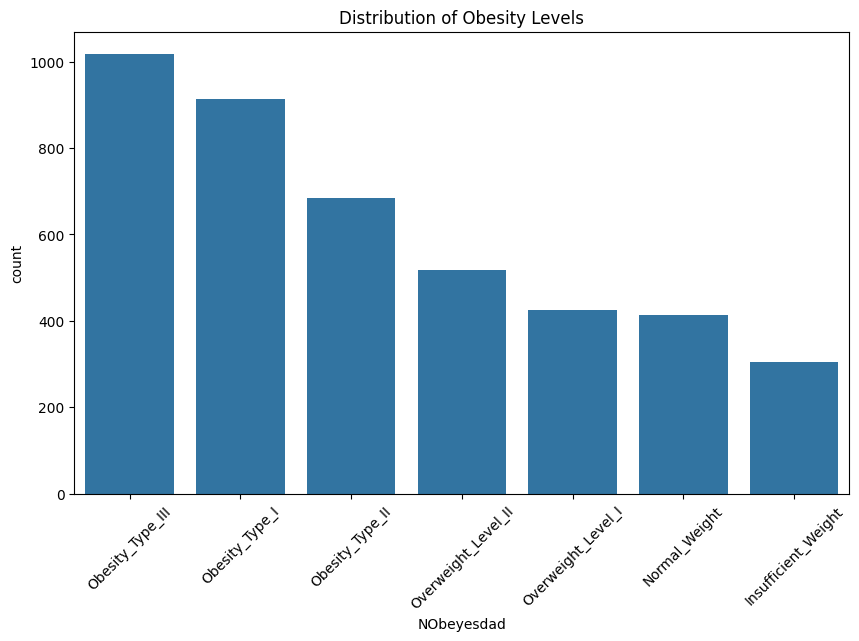

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels")
plt.show()


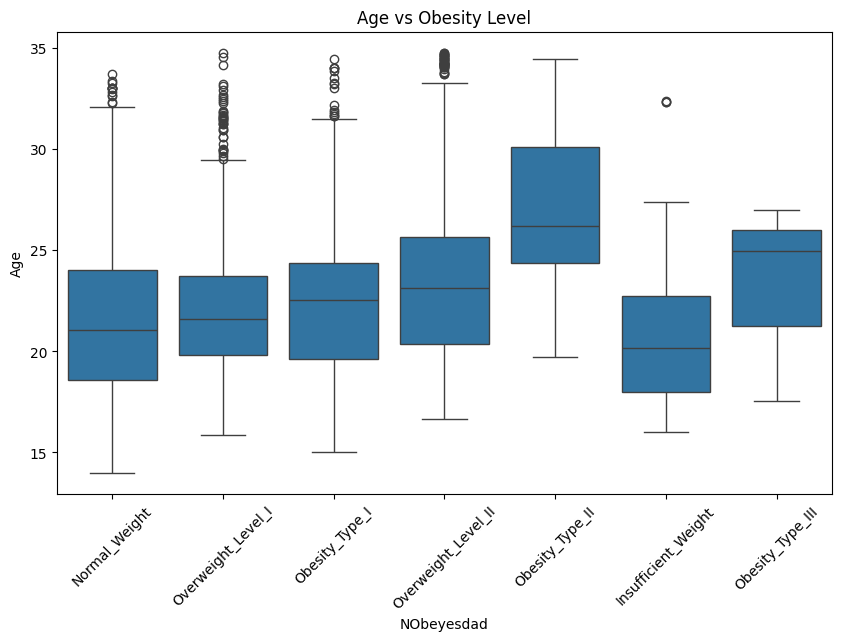

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NObeyesdad', y='Age', data=df)
plt.xticks(rotation=45)
plt.title("Age vs Obesity Level")
plt.show()


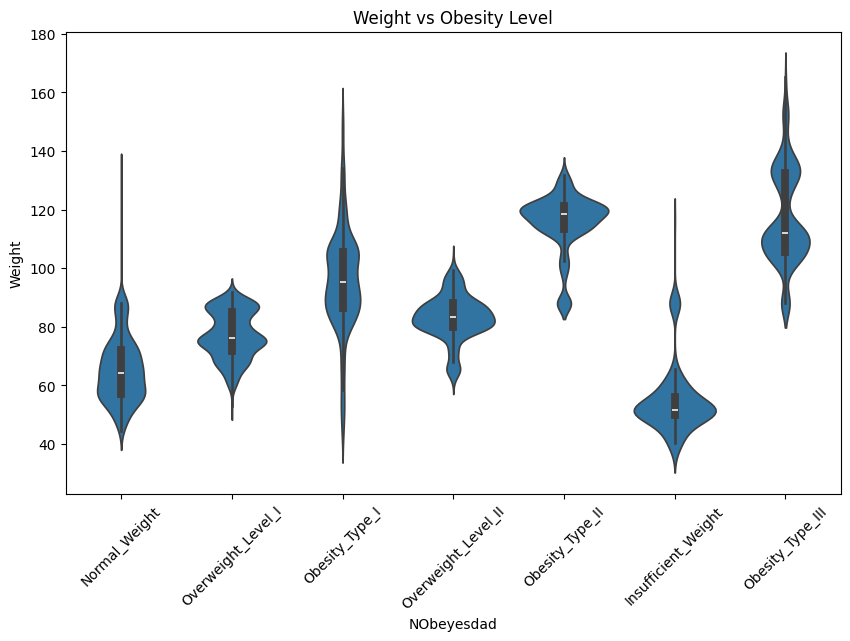

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x='NObeyesdad', y='Weight', data=df)
plt.xticks(rotation=45)
plt.title("Weight vs Obesity Level")
plt.show()

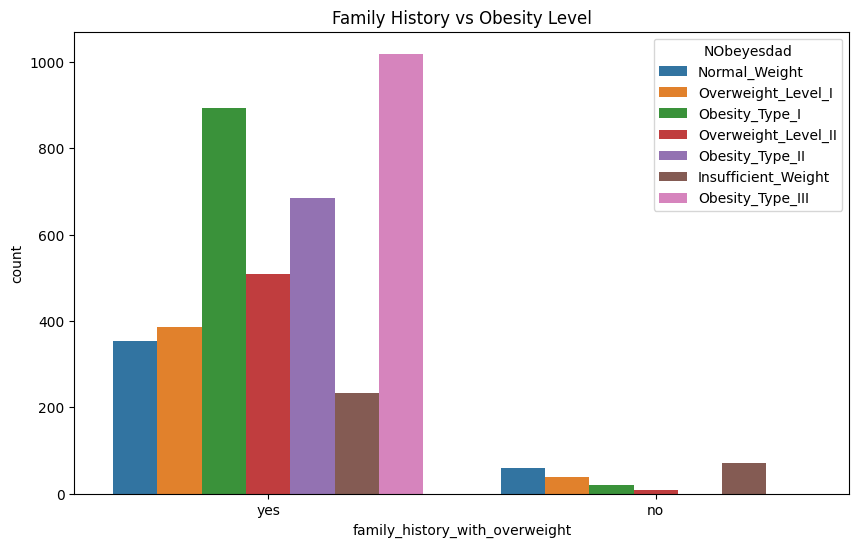

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)
plt.title("Family History vs Obesity Level")
plt.xticks(rotation=0)
plt.show()

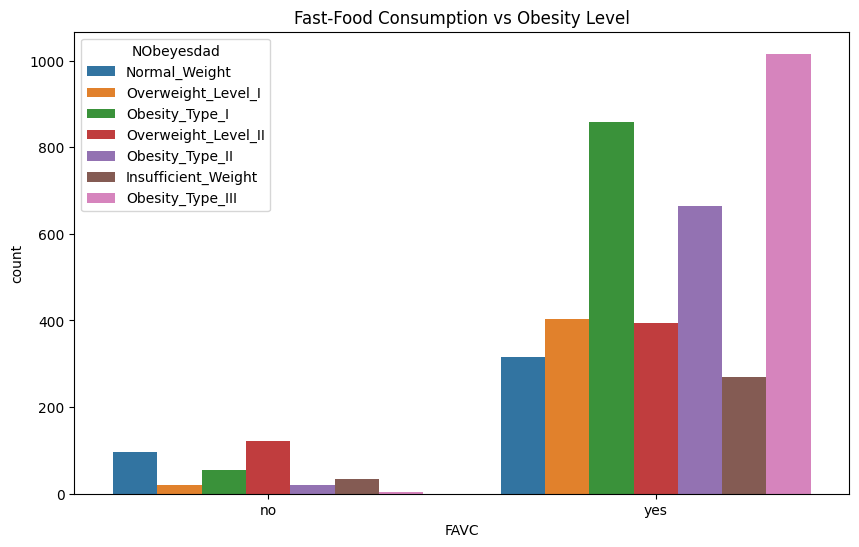

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='FAVC', hue='NObeyesdad', data=df)
plt.title("Fast-Food Consumption vs Obesity Level")
plt.show()

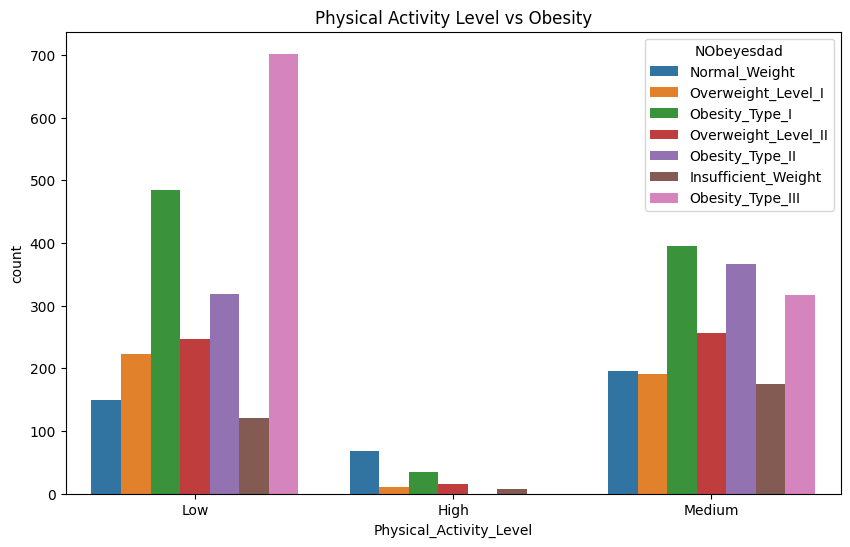

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Physical_Activity_Level', hue='NObeyesdad', data=df)
plt.title("Physical Activity Level vs Obesity")
plt.show()

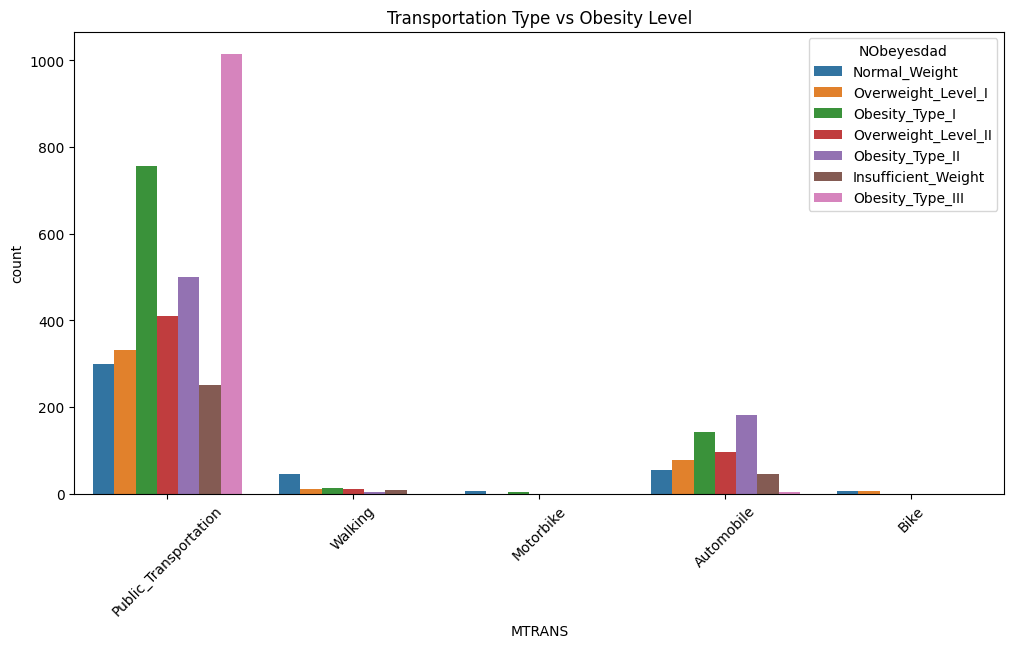

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df)
plt.title("Transportation Type vs Obesity Level")
plt.xticks(rotation=45)
plt.show()

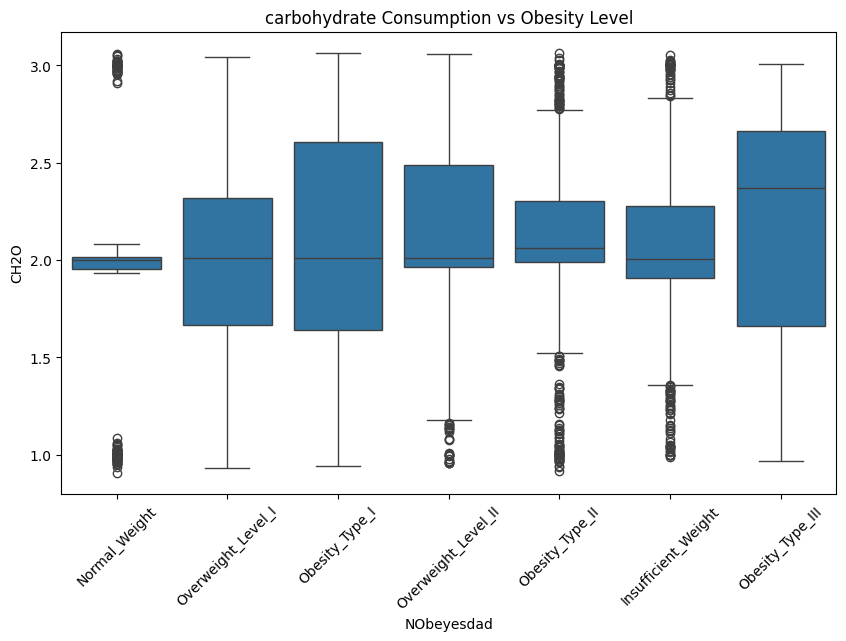

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NObeyesdad', y='CH2O', data=df)
plt.title("carbohydrate Consumption vs Obesity Level")
plt.xticks(rotation=45)
plt.show()

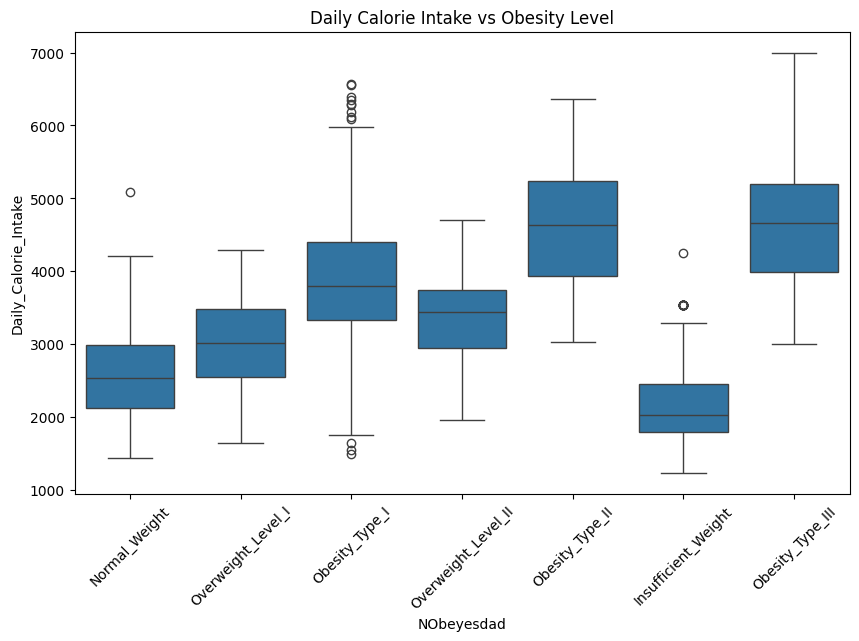

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NObeyesdad', y='Daily_Calorie_Intake', data=df)
plt.title("Daily Calorie Intake vs Obesity Level")
plt.xticks(rotation=45)
plt.show()

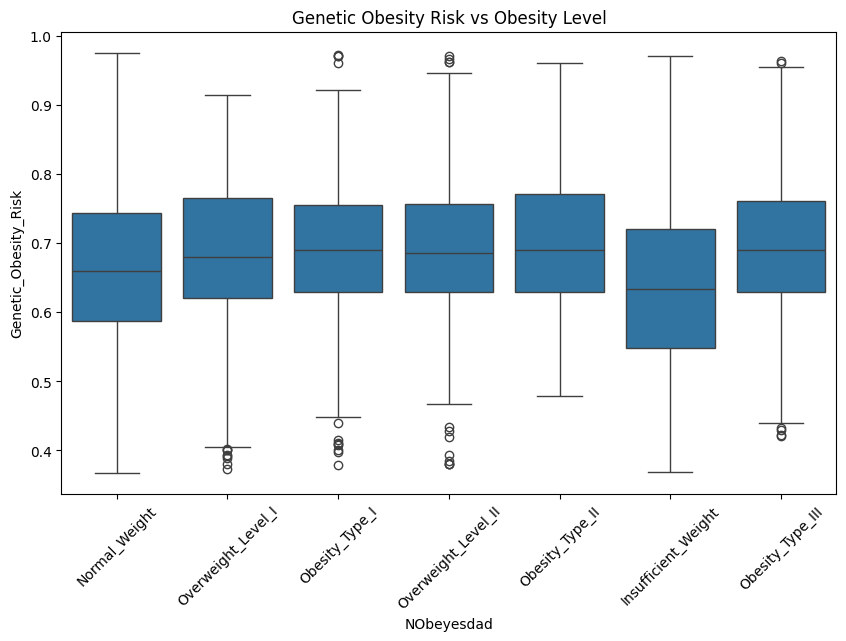

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NObeyesdad', y='Genetic_Obesity_Risk', data=df)
plt.title("Genetic Obesity Risk vs Obesity Level")
plt.xticks(rotation=45)
plt.show()

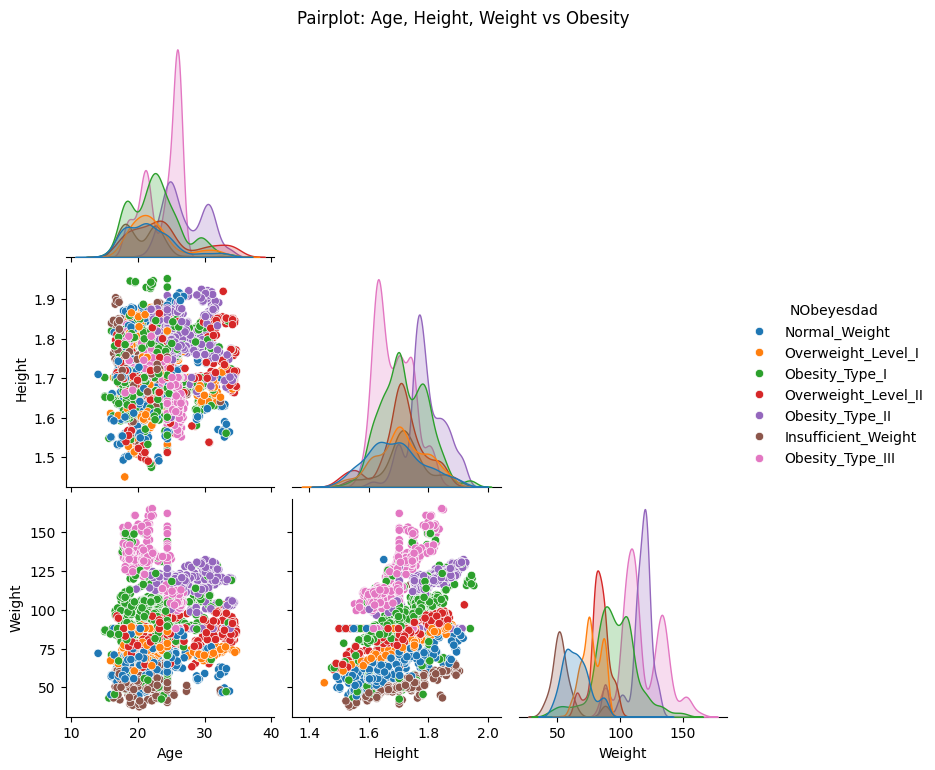

In [21]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'NObeyesdad']], hue='NObeyesdad', corner=True)
plt.suptitle("Pairplot: Age, Height, Weight vs Obesity", y=1.02)
plt.show()

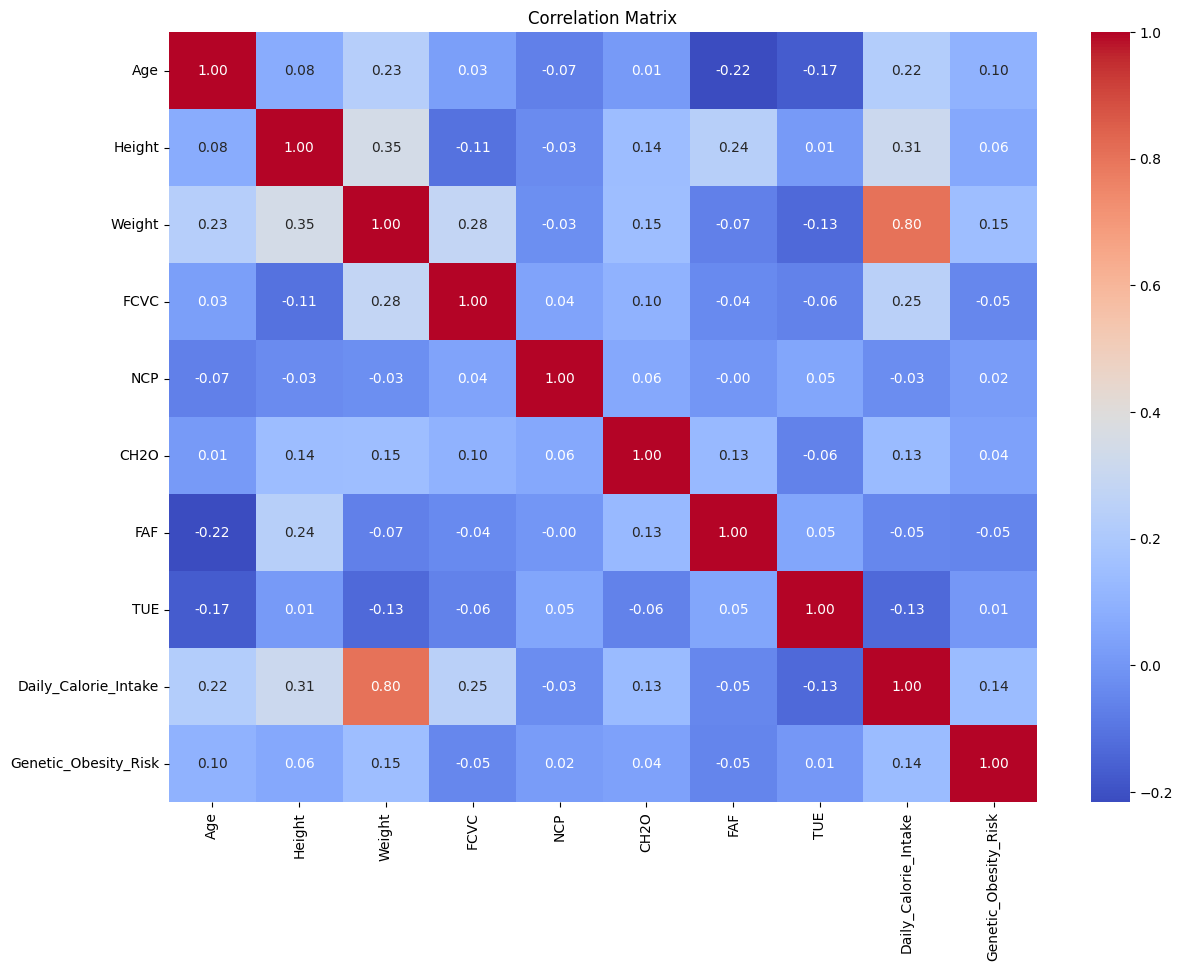

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

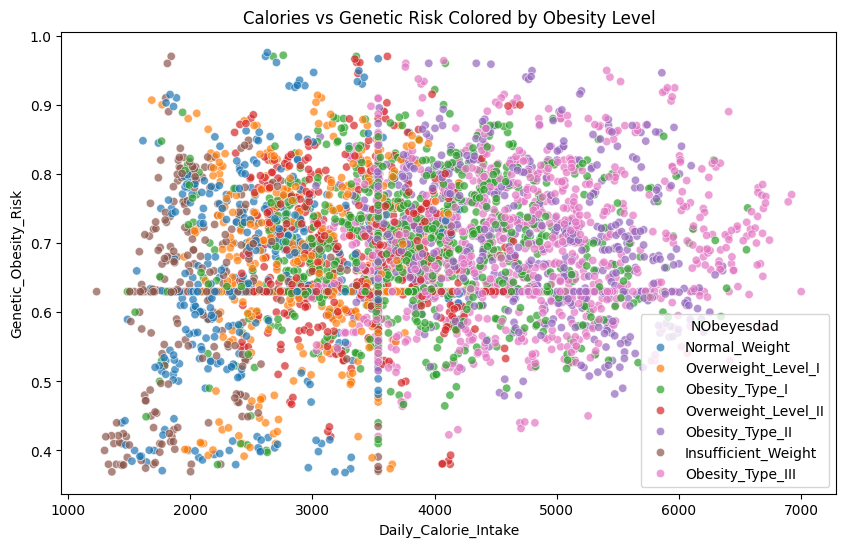

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Daily_Calorie_Intake', y='Genetic_Obesity_Risk', hue='NObeyesdad', data=df, alpha=0.7)
plt.title("Calories vs Genetic Risk Colored by Obesity Level")
plt.show()


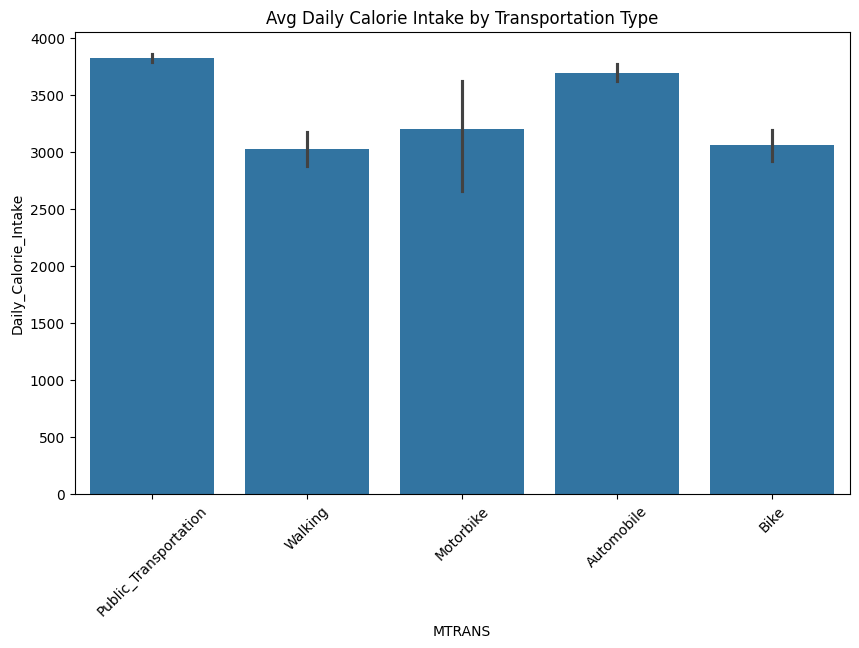

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='MTRANS', y='Daily_Calorie_Intake', data=df)
plt.xticks(rotation=45)
plt.title("Avg Daily Calorie Intake by Transportation Type")
plt.show()

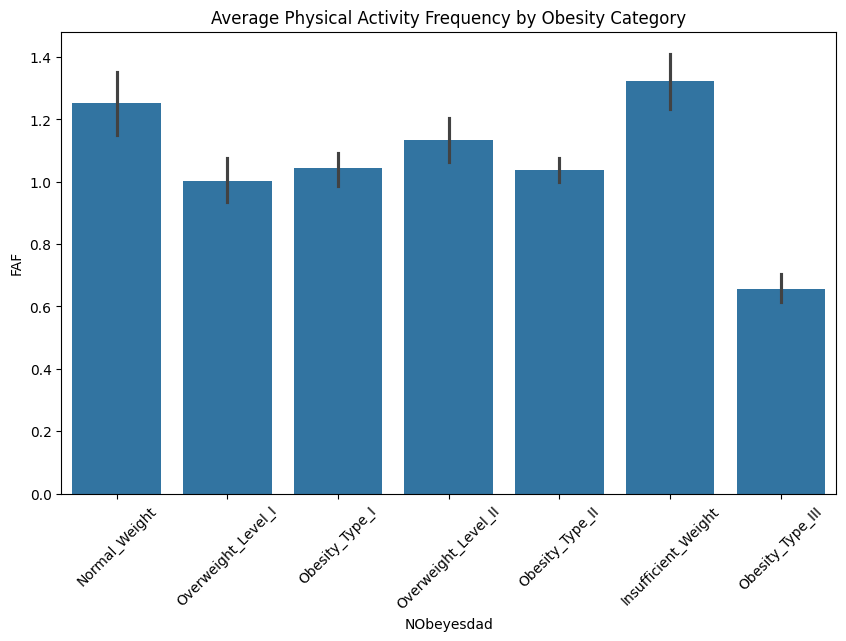

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='NObeyesdad', y='FAF', data=df)
plt.title("Average Physical Activity Frequency by Obesity Category")
plt.xticks(rotation=45)
plt.show()


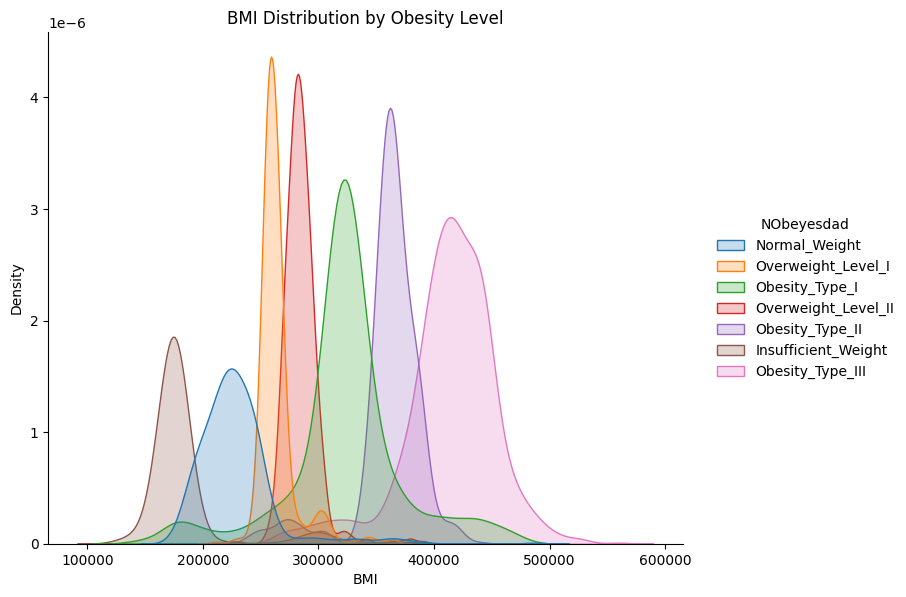

In [26]:
df['BMI'] = df['Weight'] / (df['Height']/100) ** 2

sns.displot(df, x='BMI', hue='NObeyesdad', kind='kde', height=6, aspect=1.2, fill=True)
plt.title("BMI Distribution by Obesity Level")
plt.show()


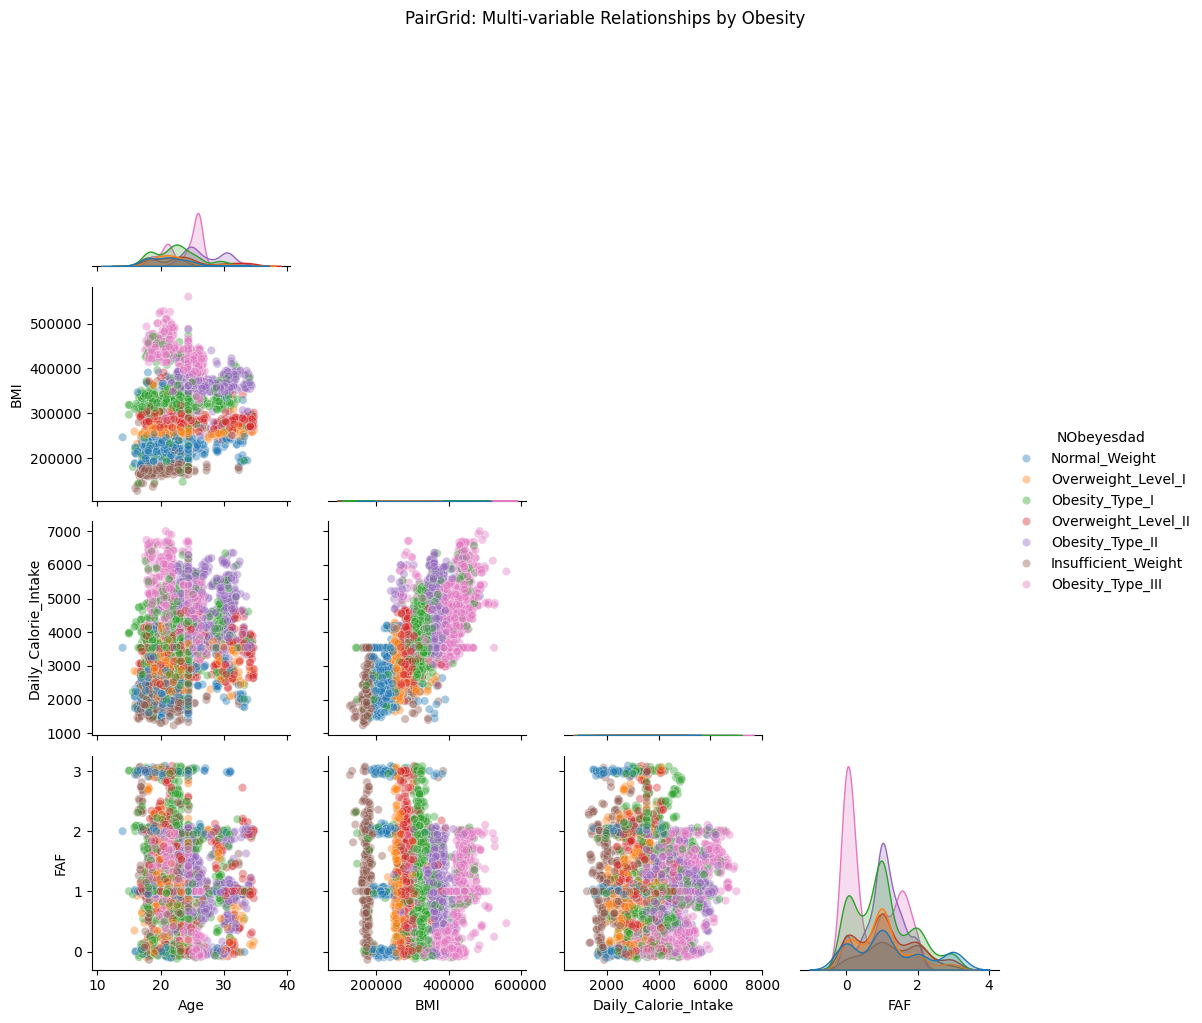

In [27]:
vars_ = ['Age','BMI','Daily_Calorie_Intake','FAF']
g = sns.PairGrid(df, vars=vars_, hue='NObeyesdad', corner=True, height=2.5)
g.map_diag(sns.kdeplot, fill=True)
g.map_offdiag(sns.scatterplot, alpha=0.4)
g.add_legend()
plt.suptitle("PairGrid: Multi-variable Relationships by Obesity", y=1.02)
plt.show()


In [28]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])



In [29]:
# 🧽 Feature scaling
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
# 🧠 Models
test_model = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42, verbosity=0)
]
model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'XGBoost'
]


In [32]:
result = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
all_preds = []

for i, model in enumerate(test_model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    result.loc[i] = [
        model_names[i],
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='macro'),
        recall_score(y_test, y_pred, average='macro'),
        f1_score(y_test, y_pred, average='macro')
    ]

    all_preds.append(y_pred)

result


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.740351,0.716407,0.720698,0.716852
1,Decision Tree,0.800000,0.808455,0.789660,0.797210
2,Random Forest,0.911111,0.906069,0.917710,0.909341
3,XGBoost,0.897076,0.890736,0.898655,0.893303


/tmp/ipython-input-33-2898330336.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=sorted_result, palette=bar_colors)


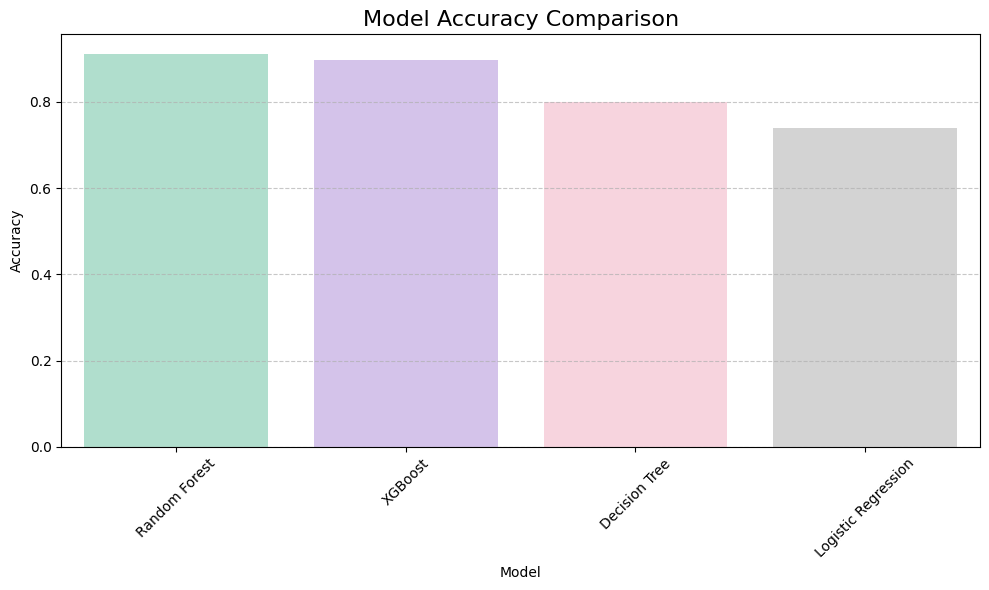

In [33]:
sorted_result = result.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

unique_accuracies = sorted_result["Accuracy"].unique()

color_map = {
    0: "#A8E6CF",  # Mint (highest)
    1: "#D3BDF0",  # Lavender
    2: "#FDCEDC",  # Baby Pink
    3: "#D3D3D3",  # Baby Gray
}

color_dict = {}
for i, acc in enumerate(unique_accuracies):
    color_dict[acc] = color_map.get(i, "#CCCCCC")

bar_colors = [color_dict[acc] for acc in sorted_result["Accuracy"]]




plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=sorted_result, palette=bar_colors)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


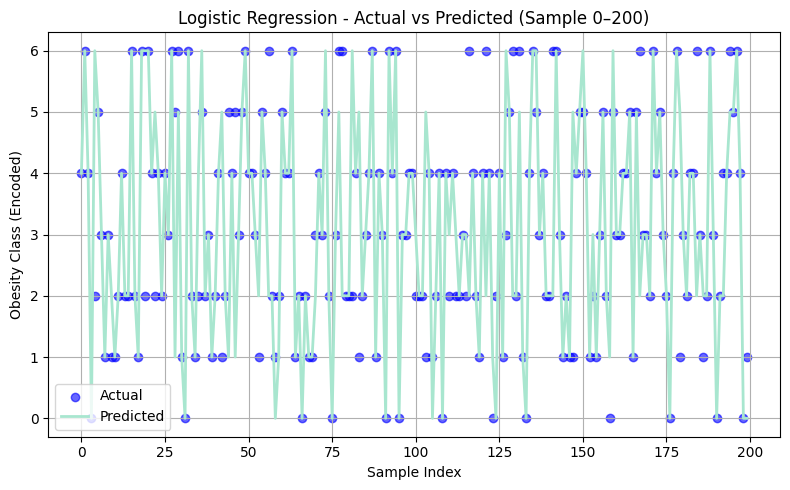

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(range(200), y_test[:200], color='blue', label='Actual', alpha=0.6)
plt.plot(range(200), all_preds[0][:200], color="#A8E6CF", label='Predicted', linewidth=2)
plt.title("Logistic Regression - Actual vs Predicted (Sample 0–200)")
plt.xlabel("Sample Index")
plt.ylabel("Obesity Class (Encoded)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


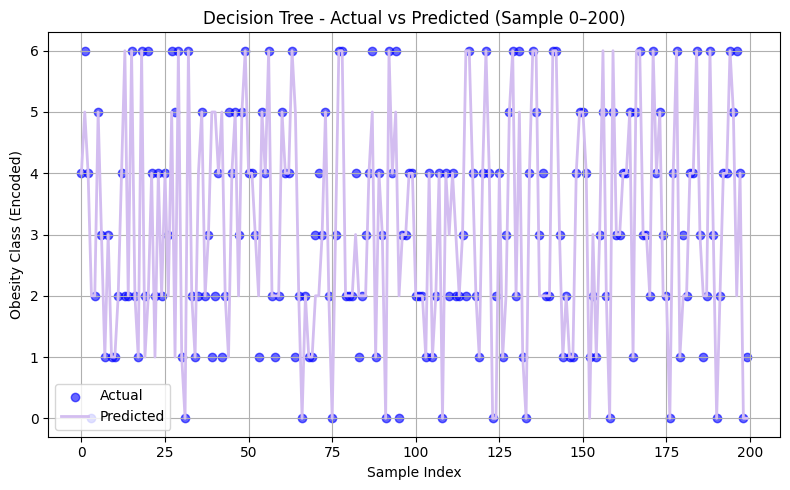

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(range(200), y_test[:200], color='blue', label='Actual', alpha=0.6)
plt.plot(range(200), all_preds[1][:200], color="#D3BDF0", label='Predicted', linewidth=2)
plt.title("Decision Tree - Actual vs Predicted (Sample 0–200)")
plt.xlabel("Sample Index")
plt.ylabel("Obesity Class (Encoded)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


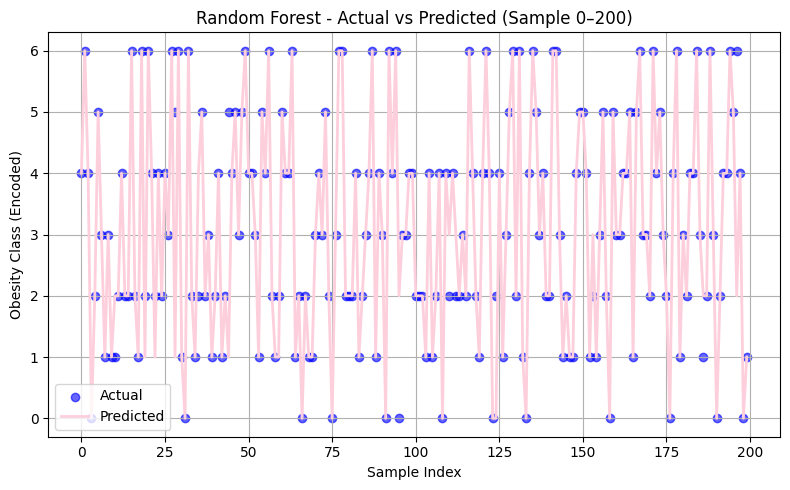

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(range(200), y_test[:200], color='blue', label='Actual', alpha=0.6)
plt.plot(range(200), all_preds[2][:200], color="#FDCEDC", label='Predicted', linewidth=2)
plt.title("Random Forest - Actual vs Predicted (Sample 0–200)")
plt.xlabel("Sample Index")
plt.ylabel("Obesity Class (Encoded)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


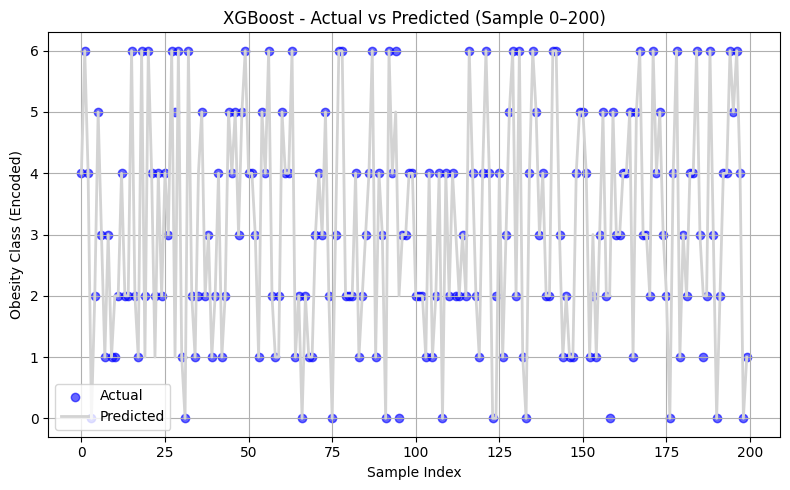

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(range(200), y_test[:200], color='blue', label='Actual', alpha=0.6)
plt.plot(range(200), all_preds[3][:200], color="#D3D3D3", label='Predicted', linewidth=2)
plt.title("XGBoost - Actual vs Predicted (Sample 0–200)")
plt.xlabel("Sample Index")
plt.ylabel("Obesity Class (Encoded)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
